In [2]:

import pandas as pd
import numpy as np
import re
import math
import os
import subprocess

# Text and feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Evaluation and tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc)

# Classifier
from sklearn.naive_bayes import GaussianNB

# Text cleaning & stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import torch
import torch.nn

[nltk_data] Downloading package stopwords to /Users/dwika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Analzyze distribution of sentiment 0 and 1s

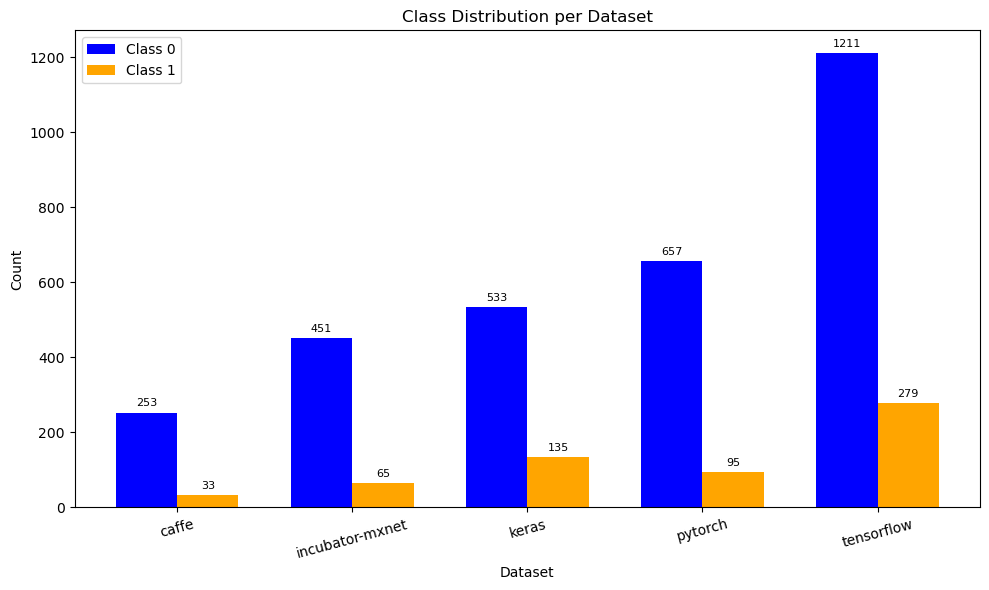

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder and filenames
folder_path = "datasets/"
filenames = ["caffe.csv", "incubator-mxnet.csv", "keras.csv", "pytorch.csv", "tensorflow.csv"]

# Dictionary to store class distributions
class_distributions = {}

# Read each file and compute the distribution of the 'class' column
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    class_counts = df['class'].value_counts().sort_index()
    class_distributions[filename] = class_counts

# Prepare data for combined bar plot
dataset_names = []
class_0_counts = []
class_1_counts = []

for filename in filenames:
    counts = class_distributions.get(filename, pd.Series([0, 0]))
    dataset_names.append(filename.replace(".csv", ""))
    class_0_counts.append(counts.get(0, 0))
    class_1_counts.append(counts.get(1, 0))

x = range(len(dataset_names))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars0 = ax.bar([i - width/2 for i in x], class_0_counts, width, label='Class 0', color='blue')
bars1 = ax.bar([i + width/2 for i in x], class_1_counts, width, label='Class 1', color='orange')

# Add counts on top of bars
for bar in bars0 + bars1:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Labeling
ax.set_xlabel("Dataset")
ax.set_ylabel("Count")
ax.set_title("Class Distribution per Dataset")
ax.set_xticks(x)
ax.set_xticklabels(dataset_names, rotation=15)
ax.legend()

plt.tight_layout()
plt.show()

# Show the ratio 

In [4]:
# Show the ratio of each class to figure out which is better for ratio of 0 and 1

for i in range(len(class_0_counts)):
    print(f"Dataset: {filenames[i]}, Ratio:{class_1_counts[i]/class_0_counts[i]}")

Dataset: caffe.csv, Ratio:0.13043478260869565
Dataset: incubator-mxnet.csv, Ratio:0.14412416851441243
Dataset: keras.csv, Ratio:0.25328330206378985
Dataset: pytorch.csv, Ratio:0.1445966514459665
Dataset: tensorflow.csv, Ratio:0.23038810900082576


# Base line model all accuracy 

In [5]:
df_baseline_performance = pd.read_csv('baselines_data/tensorflow_NB_detailed_baseline.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.559899,0.024131
Precision,0.637309,0.014114
Recall,0.714005,0.016352
F1,0.541056,0.024707
AUC,0.714005,0.016352


# Performance on infering baseline with other datasets

In [6]:
df_baseline_performance = pd.read_csv('baselines_data/pytorch_NB_tensorflow_based_detailed_baseline.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
summary_stats_combined = mean_values.round(6).astype(str) + ' ± ' + std_values.astype(str)

# Convert to DataFrame
summary_stats_single_column = pd.DataFrame({
    'Mean ± Std': summary_stats_combined
})

summary_stats_single_column

,Mean ± Std
Accuracy,0.587766 ± 1.1390647892519134e-16
Precision,0.602837 ± 1.1390647892519134e-16
Recall,0.732564 ± 1.1390647892519134e-16
F1,0.528811 ± 2.278129578503827e-16
AUC,0.732564 ± 2.278129578503827e-16


In [7]:
df_baseline_performance = pd.read_csv('baselines_data/keras_NB_tensorflow_based_detailed_baseline.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.497006,0.000000e+00
Precision,0.631713,0.000000e+00
Recall,0.673741,1.139065e-16
F1,0.491421,1.708597e-16
AUC,0.673741,1.139065e-16


In [8]:
df_baseline_performance = pd.read_csv('baselines_data/incubator-mxnet_NB_tensorflow_based_detailed_baseline.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.591085,1.139065e-16
Precision,0.608717,2.278130e-16
Recall,0.746324,1.139065e-16
F1,0.533712,0.000000e+00
AUC,0.746324,0.000000e+00


In [9]:
df_baseline_performance = pd.read_csv('baselines_data/caffe_NB_tensorflow_based_detailed_baseline.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.538462,0.000000e+00
Precision,0.588273,1.139065e-16
Recall,0.712780,0.000000e+00
F1,0.485191,5.695324e-17
AUC,0.712780,0.000000e+00


In [10]:
import pandas as pd

# Define the filenames and labels
files = {
    'TensorFlow_Baseline': 'baselines_data/tensorflow_NB_detailed_baseline.csv',
    'Tensorflow->PyTorch': 'baselines_data/pytorch_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->Keras': 'baselines_data/keras_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->MXNet': 'baselines_data/incubator-mxnet_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->Caffe': 'baselines_data/caffe_NB_tensorflow_based_detailed_baseline.csv'
}

# Collect summary stats in a list
summary_list = []

for label, filepath in files.items():
    df = pd.read_csv(filepath)
    
    # Drop iteration column if exists
    if 'iteration' in df.columns:
        df = df.drop(columns=['iteration'])
    
    # Compute mean and std
    mean = df.mean()
    std = df.std()
    
    # Create summary table for this dataset
    summary = pd.DataFrame({
        'Model': label,
        'Metric': mean.index,
        'Mean': mean.values,
        'Standard Deviation': std.values
    })
    
    summary_list.append(summary)

# Combine all summaries into one table
all_summaries = pd.concat(summary_list, ignore_index=True)

# Show the final table
print(all_summaries)


                  Model     Metric      Mean  Standard Deviation
0   TensorFlow_Baseline   Accuracy  0.559899        2.413150e-02
1   TensorFlow_Baseline  Precision  0.637309        1.411443e-02
2   TensorFlow_Baseline     Recall  0.714005        1.635240e-02
3   TensorFlow_Baseline         F1  0.541056        2.470663e-02
4   TensorFlow_Baseline        AUC  0.714005        1.635240e-02
5   Tensorflow->PyTorch   Accuracy  0.587766        1.139065e-16
6   Tensorflow->PyTorch  Precision  0.602837        1.139065e-16
7   Tensorflow->PyTorch     Recall  0.732564        1.139065e-16
8   Tensorflow->PyTorch         F1  0.528811        2.278130e-16
9   Tensorflow->PyTorch        AUC  0.732564        2.278130e-16
10    Tensorflow->Keras   Accuracy  0.497006        0.000000e+00
11    Tensorflow->Keras  Precision  0.631713        0.000000e+00
12    Tensorflow->Keras     Recall  0.673741        1.139065e-16
13    Tensorflow->Keras         F1  0.491421        1.708597e-16
14    Tensorflow->Keras  

In [11]:
import pandas as pd

# List of file paths and corresponding labels
files = {
    'TensorFlow_Baseline': 'baselines_data/tensorflow_NB_detailed_baseline.csv',
    'Tensorflow->PyTorch': 'baselines_data/pytorch_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->Keras': 'baselines_data/keras_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->MXNet': 'baselines_data/incubator-mxnet_NB_tensorflow_based_detailed_baseline.csv',
    'Tensorflow->Caffe': 'baselines_data/caffe_NB_tensorflow_based_detailed_baseline.csv'
}

# List to store each summary DataFrame
summary_tables = []

for name, path in files.items():
    df = pd.read_csv(path)
    if 'iteration' in df.columns:
        df = df.drop(columns=['iteration'])
    
    mean_values = df.mean()
    std_values = df.std()
    
    summary = pd.DataFrame({
        f'{name} Mean': mean_values,
        f'{name} Std': std_values
    })
    
    summary_tables.append(summary)

# Combine all summary tables side-by-side
side_by_side_table = pd.concat(summary_tables, axis=1)

# Display final combined table
print(side_by_side_table)


           TensorFlow_Baseline Mean  TensorFlow_Baseline Std  \
Accuracy                   0.559899                 0.024131   
Precision                  0.637309                 0.014114   
Recall                     0.714005                 0.016352   
F1                         0.541056                 0.024707   
AUC                        0.714005                 0.016352   

           Tensorflow->PyTorch Mean  Tensorflow->PyTorch Std  \
Accuracy                   0.587766             1.139065e-16   
Precision                  0.602837             1.139065e-16   
Recall                     0.732564             1.139065e-16   
F1                         0.528811             2.278130e-16   
AUC                        0.732564             2.278130e-16   

           Tensorflow->Keras Mean  Tensorflow->Keras Std  \
Accuracy                 0.497006           0.000000e+00   
Precision                0.631713           0.000000e+00   
Recall                   0.673741           1.1390

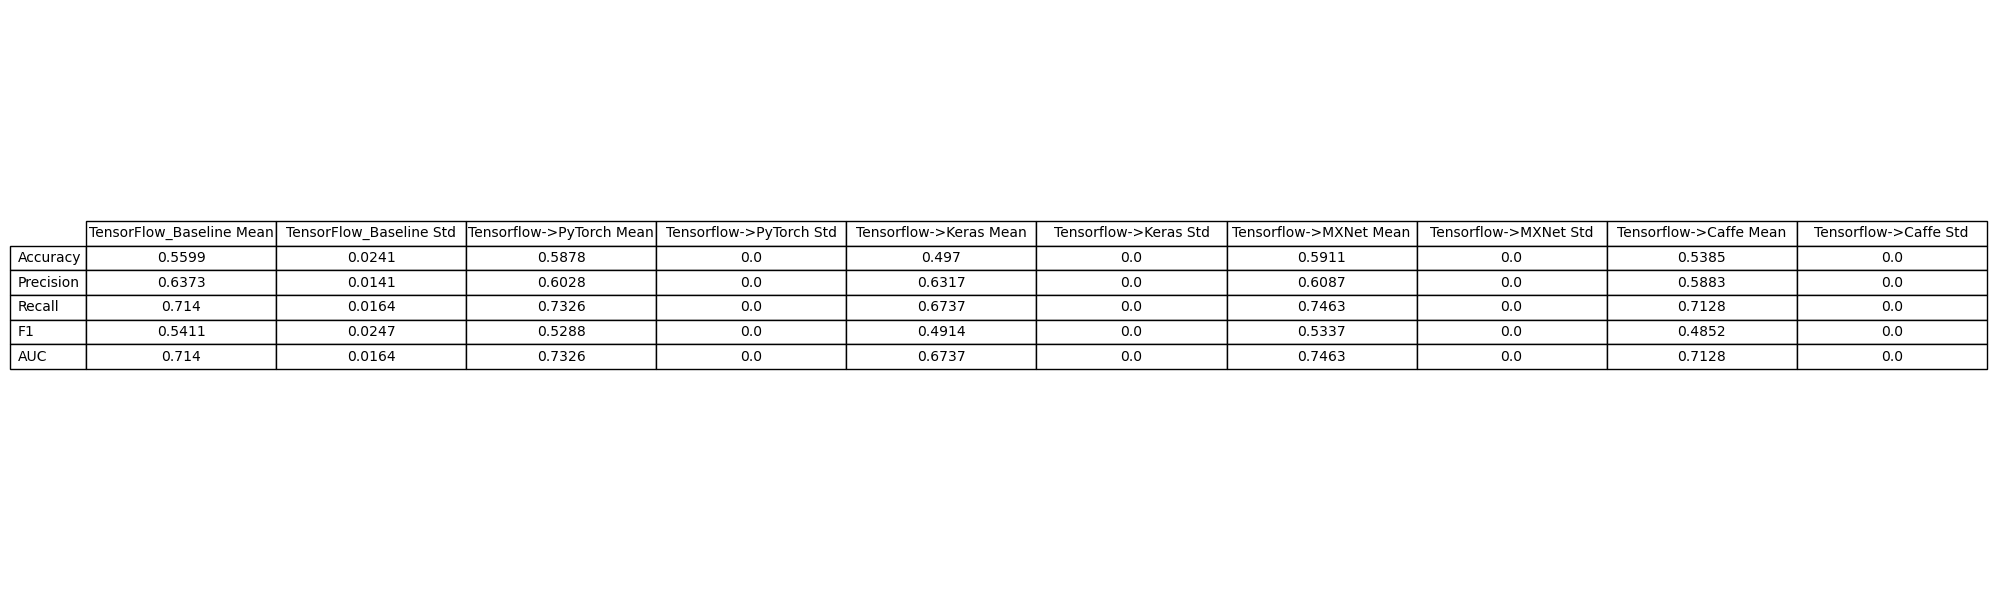

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.axis('off')
table = ax.table(
    cellText=side_by_side_table.round(4).values,
    colLabels=side_by_side_table.columns,
    rowLabels=side_by_side_table.index,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("baseline_summary_table.png", dpi=300)
plt.show()

# Plotting the data in bar chart

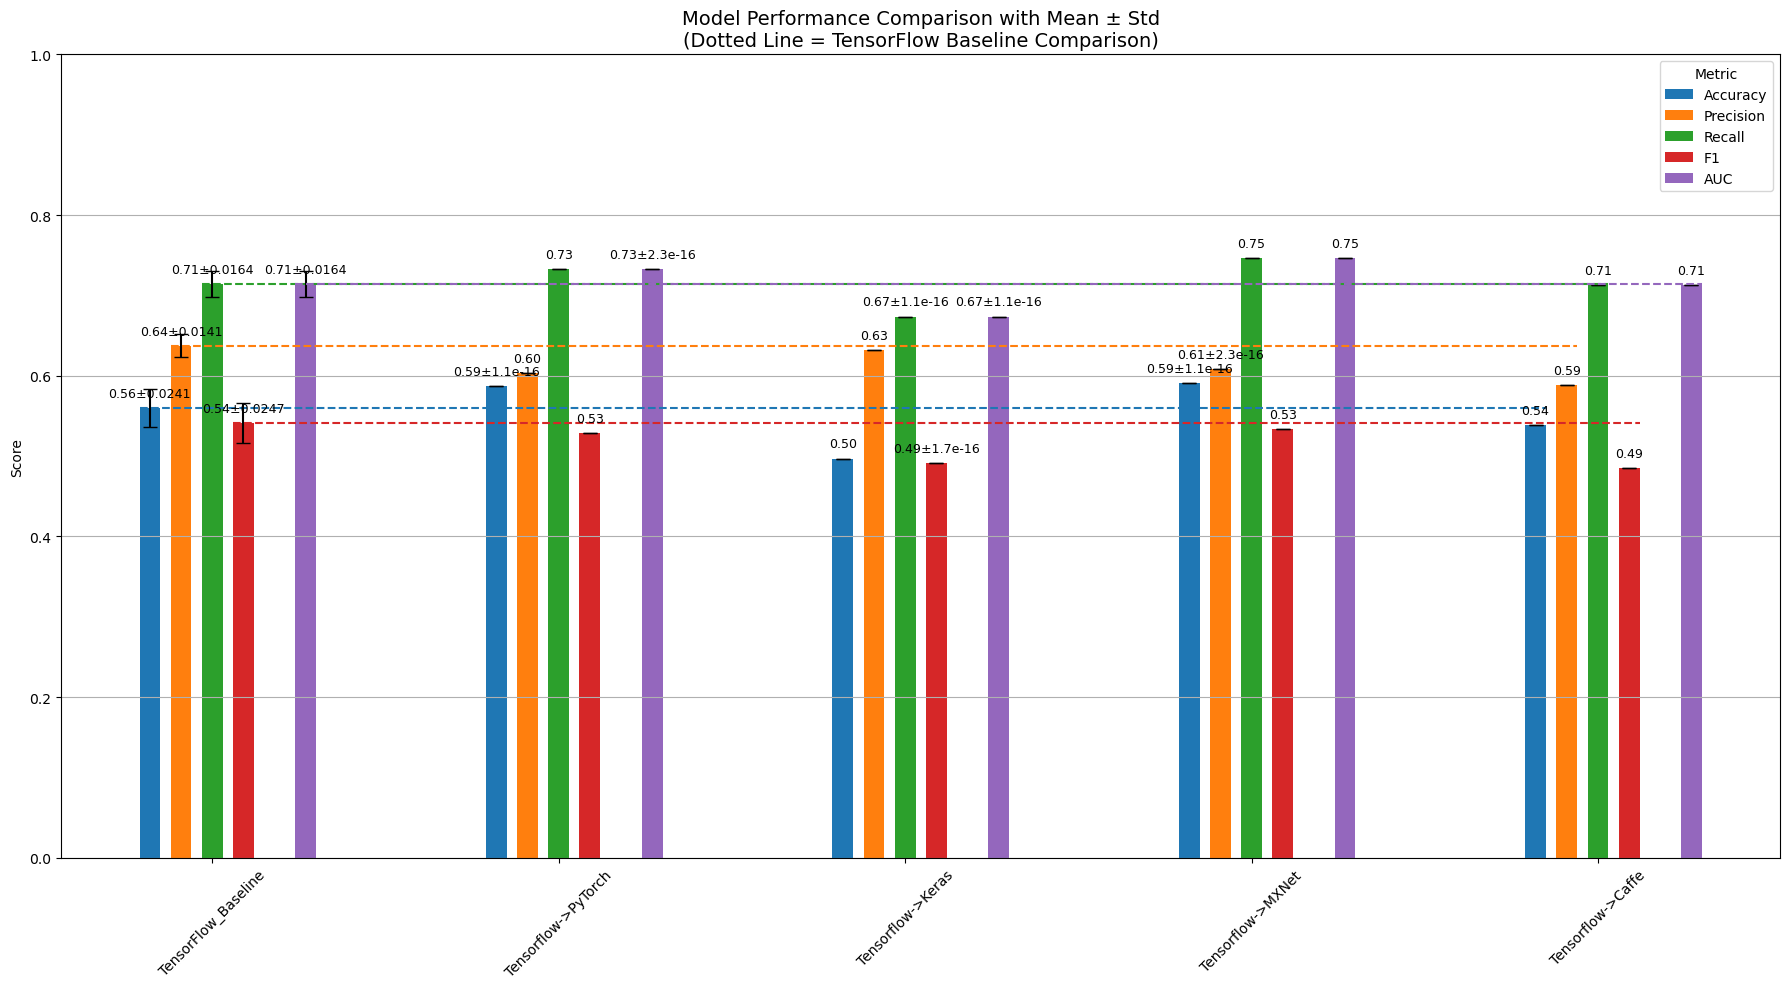

In [13]:

# Metrics to include
selected_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
summary_list = []

# Load data and calculate stats
for label, filepath in files.items():
    df = pd.read_csv(filepath)

    if 'iteration' in df.columns:
        df = df.drop(columns=['iteration'])

    mean = df.mean()
    std = df.std()

    for metric in selected_metrics:
        summary_list.append({
            'Model': label,
            'Metric': metric,
            'Mean': mean[metric],
            'Standard Deviation': std[metric]
        })

summary_df = pd.DataFrame(summary_list)


baseline_means = summary_df[summary_df['Model'] == 'TensorFlow_Baseline'].set_index('Metric')['Mean']


colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
custom_offsets = {
    'Accuracy': -2,
    'Precision': -1,
    'Recall': 0,
    'F1': 1,
    'AUC': 3  
}
bar_spacing = 0.18
bar_width = 0.12
group_spacing = 2
x_labels = list(files.keys())
x = np.arange(len(x_labels)) * group_spacing
std_threshold = 1e-4

# Exceptions to only shows standard deviations that are not too small
exceptions = {
    ('F1', 'Tensorflow->Keras'),
    ('Accuracy', 'Tensorflow->PyTorch'),
    ('Accuracy', 'Tensorflow->MXNet'),
    ('Precision', 'Tensorflow->MXNet'),
    ('Recall', 'Tensorflow->Keras'),
    ('AUC', 'Tensorflow->PyTorch'),
    ('AUC', 'Tensorflow->Keras')
}
excluded = ('F1', 'Tensorflow->MXNet')  # Too small 

# Plotting
fig, ax = plt.subplots(figsize=(18, 10))

for i, metric in enumerate(selected_metrics):
    metric_data = summary_df[summary_df['Metric'] == metric]
    means = metric_data['Mean'].values
    stds = metric_data['Standard Deviation'].values
    models = metric_data['Model'].values
    offset = custom_offsets[metric] * bar_spacing
    positions = x + offset

    bars = ax.bar(positions, means, bar_width, yerr=stds, label=metric, capsize=5, color=colors[i])

    for pos, mean_val, std_val, model in zip(positions, means, stds, models):
        if (metric, model) == excluded:
            label = f'{mean_val:.2f}'
        elif std_val < std_threshold and (metric, model) not in exceptions:
            label = f'{mean_val:.2f}'
        else:
            std_str = f'{std_val:.1e}' if std_val < 0.0001 else f'{std_val:.4f}'
            label = f'{mean_val:.2f}±{std_str}'
        ax.text(pos, mean_val + 0.01, label, ha='center', va='bottom', fontsize=9)

    # Draw baseline dotted line for this metric
    baseline_val = baseline_means[metric]
    start_x = positions[0] - bar_width / 2
    end_x = positions[-1] + bar_width / 2
    ax.hlines(y=baseline_val, xmin=start_x, xmax=end_x, linestyle='--', color=colors[i], linewidth=1.5)

# Final formatting
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.set_title('Model Performance Comparison with Mean ± Std\n(Dotted Line = TensorFlow Baseline Comparison)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, fontsize=10)
ax.legend(title='Metric', fontsize=10)
plt.tight_layout()
ax.grid(axis='y')

plt.show()


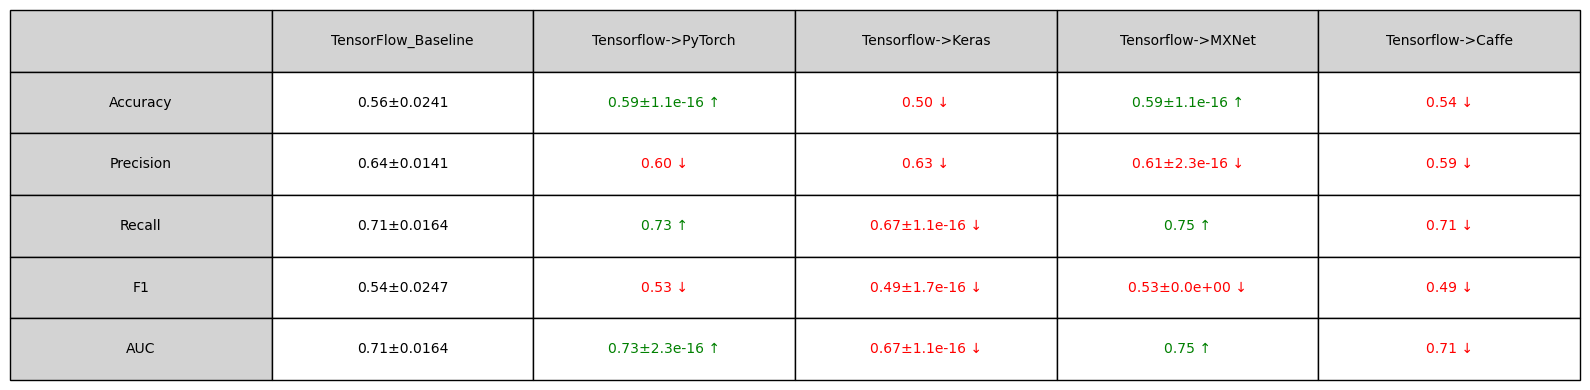

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

summary_list = []

for label, filepath in files.items():
    df = pd.read_csv(filepath)
    if 'iteration' in df.columns:
        df = df.drop(columns=['iteration'])

    mean = df.mean()
    std = df.std()

    for metric in selected_metrics:
        summary_list.append({
            'Model': label,
            'Metric': metric,
            'Mean': mean[metric],
            'Standard Deviation': std[metric]
        })

summary_df = pd.DataFrame(summary_list)

#  Format values with ± notation
std_threshold = 1e-4
exceptions = {
    ('F1', 'Tensorflow->Keras'),
    ('Accuracy', 'Tensorflow->PyTorch'),
    ('Accuracy', 'Tensorflow->MXNet'),
    ('Precision', 'Tensorflow->MXNet'),
    ('Recall', 'Tensorflow->Keras'),
    ('AUC', 'Tensorflow->PyTorch'),
    ('AUC', 'Tensorflow->Keras')
}
excluded = ('F1', 'Tensorflow->MXNet')

summary_table = {}
for metric in selected_metrics:
    row = {}
    for model in files.keys():
        row_data = summary_df[(summary_df['Model'] == model) & (summary_df['Metric'] == metric)]
        if not row_data.empty:
            mean = row_data['Mean'].values[0]
            std = row_data['Standard Deviation'].values[0]
            if std < std_threshold and (metric, model) != excluded and (metric, model) not in exceptions:
                formatted = f'{mean:.2f}'
            else:
                std_str = f'{std:.1e}' if std < 0.0001 else f'{std:.4f}'
                formatted = f'{mean:.2f}±{std_str}'
            row[model] = formatted
    summary_table[metric] = row

summary_table = pd.DataFrame.from_dict(summary_table, orient='index')

#  Compare to baseline and add arrows
baseline_values = summary_df[summary_df['Model'] == 'TensorFlow_Baseline'].set_index('Metric')['Mean']

def get_colored_arrow(metric, model, value):
    if model == 'TensorFlow_Baseline':
        return value, 'black'
    baseline = baseline_values[metric]
    try:
        mean_val = float(value.split('±')[0]) if '±' in value else float(value)
    except:
        return value, 'black'

    if mean_val > baseline:
        return value + ' ↑', 'green'
    elif mean_val < baseline:
        return value + ' ↓', 'red'
    else:
        return value, 'black'

# Step 4: Render matplotlib table
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_axis_off()

tbl = Table(ax, bbox=[0, 0, 1, 1])
n_rows, n_cols = len(summary_table), len(summary_table.columns)
width, height = 1.0 / (n_cols + 1), 1.0 / (n_rows + 1)

# Headers
tbl.add_cell(0, 0, width, height, text='', loc='center', facecolor='lightgray')
for j, col in enumerate(summary_table.columns):
    tbl.add_cell(0, j + 1, width, height, text=col, loc='center', facecolor='lightgray')

# Rows
for i, metric in enumerate(summary_table.index):
    tbl.add_cell(i + 1, 0, width, height, text=metric, loc='center', facecolor='lightgray')
    for j, model in enumerate(summary_table.columns):
        val = summary_table.loc[metric, model]
        display_text, color = get_colored_arrow(metric, model, val)
        cell = tbl.add_cell(i + 1, j + 1, width, height, text=display_text, loc='center', facecolor='white')
        cell.get_text().set_color(color)

ax.add_table(tbl)
plt.tight_layout()
plt.show()


# Base line performance on MLP Models 

### LayerNorm Without Tent 

In [30]:
df_baseline_performance = pd.read_csv('base_line_tf/base_data_tensorflowlayernorm.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.867617,0.021788
Precision,0.676874,0.060425
Recall,0.632865,0.069015
F1,0.652489,0.057002
AUC,0.887577,0.024459


In [31]:
# Figure out which model closely resembles the mean values 
metric_cols = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
means = df_baseline_performance[metric_cols].mean()
df_baseline_performance['distance_to_mean'] = df_baseline_performance[metric_cols].sub(means).pow(2).sum(axis=1).pow(0.5)
df_baseline_performance 

,iteration,Accuracy,Precision,Recall,F1,AUC,distance_to_mean
0,2,0.872483,0.688889,0.563636,0.620000,0.872503,0.079015
1,1,0.865772,0.684211,0.639344,0.661017,0.906620,0.023121
2,3,0.872483,0.659091,0.557692,0.604167,0.905214,0.092935
3,4,0.895973,0.709677,0.771930,0.739496,0.934556,0.176058
4,5,0.862416,0.738095,0.508197,0.601942,0.872588,0.148650
5,6,0.912752,0.796296,0.741379,0.767857,0.918678,0.205794
6,7,0.855705,0.612245,0.555556,0.582524,0.884904,0.123280
7,8,0.879195,0.690909,0.666667,0.678571,0.887020,0.046413
8,9,0.889262,0.736842,0.700000,0.717949,0.882983,0.113480
9,11,0.885906,0.762712,0.692308,0.725806,0.920271,0.132967


In [32]:
closest_row = df_baseline_performance.loc[df_baseline_performance['distance_to_mean'].idxmin()]
closest_row

iteration           1.000000
Accuracy            0.865772
Precision           0.684211
Recall              0.639344
F1                  0.661017
AUC                 0.906620
distance_to_mean    0.023121
Name: 1, dtype: float64

### From the code above by using euclidean distance we are able to to know the closest values with a distance to the mean 0.023 is the first iteration, as such it would be our basis model going forward to infer and test TENT with 

## Searching the best BatchNorm Model 

In [34]:
df_baseline_performance = pd.read_csv('base_line_tf/base_data_tensorflow_batchnorm.csv')
df_baseline_performance
# # Drop the 'iteration' column
df_baseline_no_iteration = df_baseline_performance.drop(columns=['iteration'])

# # Calculate mean and standard deviation
mean_values = df_baseline_no_iteration.mean()
std_values = df_baseline_no_iteration.std()
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
# mean_values
summary_stats

,Mean,Standard Deviation
Accuracy,0.835067,0.027997
Precision,0.566442,0.088580
Recall,0.669078,0.071664
F1,0.607176,0.055267
AUC,0.859319,0.027675


In [37]:
metric_cols = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
means = df_baseline_performance[metric_cols].mean()
df_baseline_performance['distance_to_mean'] = df_baseline_performance[metric_cols].sub(means).pow(2).sum(axis=1).pow(0.5)
closest_row = df_baseline_performance.loc[df_baseline_performance['distance_to_mean'].idxmin()]
closest_row

iteration           20.000000
Accuracy             0.825503
Precision            0.563380
Recall               0.655738
F1                   0.606061
AUC                  0.862281
distance_to_mean     0.016995
Name: 18, dtype: float64

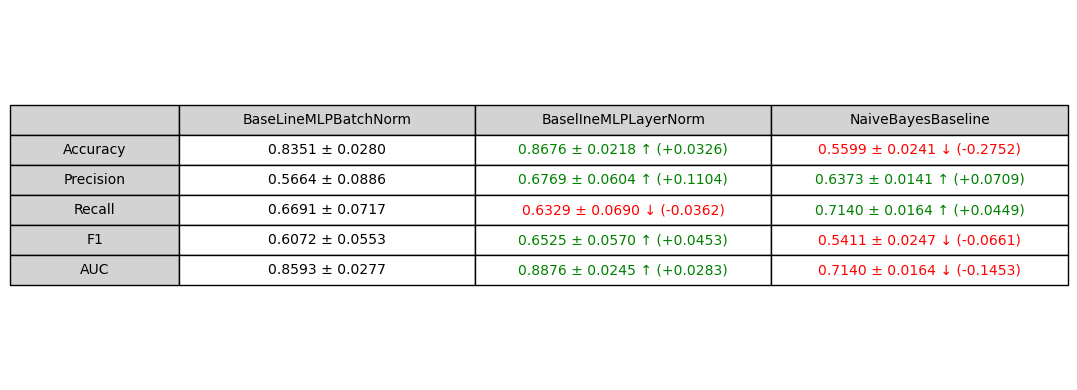

In [40]:

df_layernorm = pd.read_csv("base_line_tf/base_data_tensorflowlayernorm.csv")
df_batchnorm = pd.read_csv("base_line_tf/base_data_tensorflow_batchnorm.csv")
df_nb = pd.read_csv("baselines_data/tensorflow_NB_detailed_baseline.csv")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']


layernorm_stats = df_layernorm[metrics].agg(['mean', 'std']).T
batchnorm_stats = df_batchnorm[metrics].agg(['mean', 'std']).T
nb_stats = df_nb[metrics].agg(['mean', 'std']).T


def format_value(mean1, std1, mean2, std2):
    arrow = "↑" if mean2 > mean1 else "↓"
    diff = mean2 - mean1
    return f"{mean1:.4f} ± {std1:.4f}", f"{mean2:.4f} ± {std2:.4f} {arrow} ({diff:+.4f})"
batchnorm_vals = []
layernorm_vals = []
nb_vals = []

for metric in metrics:
    b_val, l_val = format_value(
        batchnorm_stats.loc[metric, 'mean'],
        batchnorm_stats.loc[metric, 'std'],
        layernorm_stats.loc[metric, 'mean'],
        layernorm_stats.loc[metric, 'std']
    )
    _, nb_val = format_value(
        batchnorm_stats.loc[metric, 'mean'],
        batchnorm_stats.loc[metric, 'std'],
        nb_stats.loc[metric, 'mean'],
        nb_stats.loc[metric, 'std']
    )
    batchnorm_vals.append(b_val)
    layernorm_vals.append(l_val)
    nb_vals.append(nb_val)
table_data = []
for metric, b_val, l_val, nb_val in zip(metrics, batchnorm_vals, layernorm_vals, nb_vals):
    table_data.append([metric, b_val, l_val, nb_val])
table_data.insert(0, ["", "BaseLineMLPBatchNorm", "BaselIneMLPLayerNorm", "NaiveBayesBaseline"])

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.35, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)


for row in range(len(table_data)):
    for col in range(4):
        if row == 0 or col == 0:
            table[row, col].set_facecolor('#D3D3D3')
for row_idx in range(1, len(metrics) + 1):
    layer_cell = table[row_idx, 2]
    nb_cell = table[row_idx, 3]
    
    if '↑' in table_data[row_idx][2]:
        layer_cell.get_text().set_color('green')
    elif '↓' in table_data[row_idx][2]:
        layer_cell.get_text().set_color('red')
    
    if '↑' in table_data[row_idx][3]:
        nb_cell.get_text().set_color('green')
    elif '↓' in table_data[row_idx][3]:
        nb_cell.get_text().set_color('red')

plt.tight_layout()
plt.show()
